<a href="https://colab.research.google.com/github/hyunjin95/tf-practice/blob/master/tf2_tutorials_basic_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# For now, you need to install the latest version of TensorFlow whenever you open a new runtime session.
!pip install tensorflow-gpu

# Hello World for TensorFlow2

https://www.tensorflow.org/tutorials/quickstart/beginner

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf


mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)


11493376/11490434 [==============================] - 0s 0us/step
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2941 - accuracy: 0.9145
Epoch 2/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.1428 - accuracy: 0.9575
Epoch 3/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.1092 - accuracy: 0.9675
Epoch 4/5
60000/60000 [==============================] - 4s 75us/sample - loss: 0.0879 - accuracy: 0.9730
Epoch 5/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0750 - accuracy: 0.9763
10000/1 [=====================================================================================================================================================================================================================================================================================================================================================================================

[0.07768088468648493, 0.9748]

# Fashion-MNIST with TensorFlow2.0 and Keras


https://www.tensorflow.org/tutorials/keras/classification

4423680/4422102 [==============================] - 0s 0us/step
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.4994 - accuracy: 0.8242
Epoch 2/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3768 - accuracy: 0.8648
Epoch 3/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3379 - accuracy: 0.8760
Epoch 4/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3153 - accuracy: 0.8847
Epoch 5/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2970 - accuracy: 0.8905
10000/1 [=======================================================================================================================================================================================================================================================================================================================================================================================

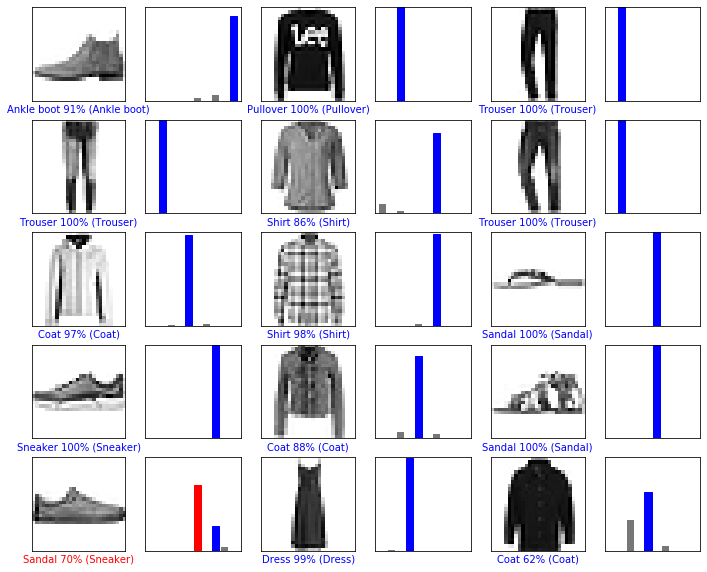

(1, 28, 28)
[[4.1509306e-06 2.9331327e-08 1.6192591e-07 3.4885153e-07 1.6905925e-06
  2.7721370e-02 9.5079236e-07 6.2611356e-02 6.5909135e-06 9.0965331e-01]]
9


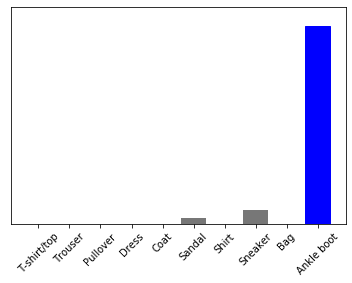

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

# plt.figure(figsize=(10,10))
# for i in range(25):
#     plt.subplot(5, 5, i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(train_images[i], cmap=plt.cm.binary)
#     plt.xlabel(class_names[train_labels[i]])
# plt.show()

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc)

predictions = model.predict(test_images)


def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(
        class_names[predicted_label],
        100*np.max(predictions_array),
        class_names[true_label]),
        color=color
    )


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    this_plot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    this_plot[predicted_label].set_color('red')
    this_plot[true_label].set_color('blue')


num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()


img = test_images[0]
img = (np.expand_dims(img, 0))
print(img.shape)
predictions_single = model.predict(img)
print(predictions_single)
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
print(np.argmax(predictions_single[0]))


# Text Classification with TF Hub and Keras

https://www.tensorflow.org/tutorials/keras/text_classification_with_hub

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

# print("Version: ", tf.__version__)
# print("Eager mode: ", tf.executing_eagerly())
# print("Hub version: ", hub.__version__)
# print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

# Split the training set into 60% and 40%, so we'll end up with 15,000 examples
# for training, 10,000 examples for validation and 25,000 examples for testing.
train_validation_split = tfds.Split.TRAIN.subsplit([6, 4])

(train_data, validation_data), test_data = tfds.load(
    name="imdb_reviews", 
    split=(train_validation_split, tfds.Split.TEST),
    as_supervised=True
)

train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))
# train_examples_batch
# train_labels_batch

embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(
    embedding,
    input_shape=[], 
    dtype=tf.string,
    trainable=True
)
hub_layer(train_examples_batch[:3])

model = tf.keras.Sequential([
    hub_layer,
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# model.summary()

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_data.shuffle(10000).batch(512),
    epochs=20,
    validation_data=validation_data.batch(512),
    verbose=1
)

results = model.evaluate(test_data.batch(512), verbose=2)
for name, value in zip(model.metrics_names, results):
    print("%s: %.3f" % (name, value))

49/49 - 4s - loss: 0.3249 - accuracy: 0.8605
loss: 0.325
accuracy: 0.860


# Text Classification with Preprocessed Text

https://www.tensorflow.org/tutorials/keras/text_classification

Epoch 1/10
782/782 [==============================] - 14s 17ms/step - loss: 0.6818 - accuracy: 0.6365 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
782/782 [==============================] - 11s 14ms/step - loss: 0.6182 - accuracy: 0.7574 - val_loss: 0.5899 - val_accuracy: 0.7896
Epoch 3/10
782/782 [==============================] - 11s 14ms/step - loss: 0.5387 - accuracy: 0.8068 - val_loss: 0.5252 - val_accuracy: 0.8229
Epoch 4/10
782/782 [==============================] - 11s 14ms/step - loss: 0.4726 - accuracy: 0.8388 - val_loss: 0.4726 - val_accuracy: 0.8313
Epoch 5/10
782/782 [==============================] - 11s 14ms/step - loss: 0.4192 - accuracy: 0.8636 - val_loss: 0.4307 - val_accuracy: 0.8531
Epoch 6/10
782/782 [==============================] - 11s 14ms/step - loss: 0.3806 - accuracy: 0.8769 - val_loss: 0.3993 - val_accuracy: 0.8583
Epoch 7/10
782/782 [==============================] - 11s 14ms/step - loss: 0.3483 - accuracy: 0.8870 - val_loss: 0.3747 - val_a

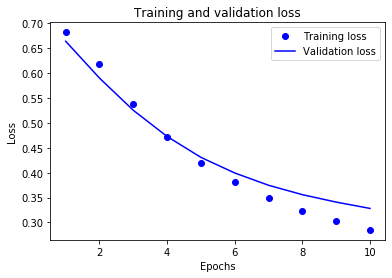

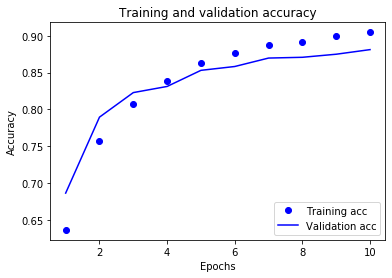

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import numpy as np


(train_data, test_data), info = tfds.load(
    # Use the version pre-encoded with an ~8k vocabulary.
    'imdb_reviews/subwords8k', 
    # Return the train/test datasets as a tuple.
    split = (tfds.Split.TRAIN, tfds.Split.TEST),
    # Return (example, label) pairs from the dataset (instead of a dictionary).
    as_supervised=True,
    # Also return the `info` structure. 
    with_info=True
)

encoder = info.features['text'].encoder
# print('Vocabulary size: {}'.format(encoder.vocab_size))


# Try the encoder
# sample_string = 'Hello, World!'
# encoded_string = encoder.encode(sample_string)
# print('Encoded string is {}'.format(encoded_string))
# decoded_string = encoder.decode(encoded_string)
# print('Decoded string is {}'.format(decoded_string))
# assert sample_string == decoded_string

# for ts in encoded_string:
#     print ('{} ----> {}'.format(ts, encoder.decode([ts])))


# Explore the data
# for train_example, train_label in train_data.take(1):
#     print('Encoded text:', train_example[:10].numpy())
#     print('Label:', train_label.numpy())
# encoder.decode(train_example)


# Prepare the data for training
BUFFER_SIZE = 1000

train_batches = (
    train_data
        .shuffle(BUFFER_SIZE)
        .padded_batch(32, tf.compat.v1.data.get_output_shapes(train_data))
)

test_batches = (
    test_data
        .padded_batch(32, tf.compat.v1.data.get_output_shapes(train_data))
)

# for example_batch, label_batch in train_batches.take(3):
#     print("Batch shape:", example_batch.shape)
#     print("Label shape:", label_batch.shape)

model = keras.Sequential([
    keras.layers.Embedding(encoder.vocab_size, 16),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(1, activation='sigmoid')
])
# model.summary()


# Loss function and optimizer
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


# Train the model
history = model.fit(
    train_batches,
    epochs=10,
    validation_data=test_batches,
    validation_steps=30
)


# Evaluate the model
loss, accuracy = model.evaluate(test_batches)
print("Loss:", loss)
print("Accuracy:", accuracy)


# Create a graph
history_dict = history.history
history_dict.keys()


import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc)+1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()



# Basic regression: Predict fuel efficiency

https://www.tensorflow.org/tutorials/keras/regression


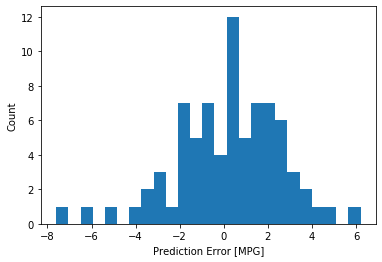

In [0]:
# Use seaborn for pairplot
!pip install -q seaborn
# Use some functions from tensorflow_docs
!pip install -q git+https://github.com/tensorflow/docs

from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

# Get the data
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
# dataset_path

column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                            'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(
    dataset_path,
    names=column_names,
    na_values = "?",
    comment='\t',
    sep=" ",
    skipinitialspace=True
)

dataset = raw_dataset.copy()
dataset.tail()

# Clean the data
dataset.isna().sum()
dataset = dataset.dropna()
# Convert the categorical column into a one-hot
dataset['Origin'] = dataset['Origin'].map(lambda x: {1: 'USA', 2: 'Europe', 3: 'Japan'}.get(x))

dataset = pd.get_dummies(dataset, prefix=' ', prefix_sep=' ')
dataset.tail()


# Split the data into train and test
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

# Inspect the data
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats


# Split features from labels
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')


# Normailze the data
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)


# Build the model
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(
        loss = 'mse',
        optimizer=optimizer,
        metrics=['mae', 'mse']
    )

    return model

model = build_model()


# Inspect the model
# model.summary()

# example_batch = normed_train_data[:10]
# example_result = model.predict(example_batch)
# example_result


# Train the model
EPOCHS = 1000

history = model.fit(
    normed_train_data,
    train_labels,
    epochs=EPOCHS,
    validation_split = 0.2,
    verbose=0,
    callbacks=[tfdocs.modeling.EpochDots()]
)

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
# hist.tail()

plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 20])
plt.ylabel('MSE [MPG^2]')


# Stop the model when the result doesn't improve
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(
                            normed_train_data,
                            train_labels, 
                            epochs=EPOCHS,
                            validation_split = 0.2,
                            verbose=0,
                            callbacks=[early_stop, tfdocs.modeling.EpochDots()]
                        )

plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))


# Make predictions
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

# Overfit and underfit

https://www.tensorflow.org/tutorials/keras/overfit_and_underfit

In [0]:
# Use some functions from tensorflow_docs
!pip install -q git+https://github.com/tensorflow/docs

from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import regularizers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

from  IPython import display
from matplotlib import pyplot as plt

import numpy as np

import pathlib
import shutil
import tempfile

logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)


# Get the dataset
gz = tf.keras.utils.get_file('HIGGS.csv.gz', 'https://archive.ics.uci.edu/ml/machine-learning-databases/00280/HIGGS.csv.gz')

FEATURES = 28
ds = tf.data.experimental.CsvDataset(gz,[float(),]*(FEATURES+1), compression_type="GZIP")

def pack_row(*row):
    label = row[0]
    features = tf.stack(row[1:],1)
    return features, label

packed_ds = ds.batch(10000).map(pack_row).unbatch()

for features,label in packed_ds.batch(1000).take(1):
    print(features[0])
    plt.hist(features.numpy().flatten(), bins = 101)

N_VALIDATION = int(1e3)
N_TRAIN = int(1e4)
BUFFER_SIZE = int(1e4)
BATCH_SIZE = 500
STEPS_PER_EPOCH = N_TRAIN//BATCH_SIZE

validate_ds = packed_ds.take(N_VALIDATION).cache()
train_ds = packed_ds.skip(N_VALIDATION).take(N_TRAIN).cache()

validate_ds = validate_ds.batch(BATCH_SIZE)
train_ds = train_ds.shuffle(BUFFER_SIZE).repeat().batch(BATCH_SIZE)


# Demonstrate overfitting
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    0.001,
    decay_steps=STEPS_PER_EPOCH*1000,
    decay_rate=1,
    staircase=False
)

def get_optimizer():
    return tf.keras.optimizers.Adam(lr_schedule)

step = np.linspace(0, 100000)
lr = lr_schedule(step)
plt.figure(figsize = (8,6))
plt.plot(step/STEPS_PER_EPOCH, lr)
plt.ylim([0, max(plt.ylim())])
plt.xlabel('Epoch')
_ = plt.ylabel('Learning Rate')

def get_callbacks(name):
    return [
        tfdocs.modeling.EpochDots(),
        tf.keras.callbacks.EarlyStopping(monitor='val_binary_crossentropy', patience=200),
        tf.keras.callbacks.TensorBoard(logdir/name)
    ]

def compile_and_fit(model, name, optimizer=None, max_epochs=10000):
    if optimizer is None:
        optimizer = get_optimizer()
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy', 'binary_crossentropy']
    )
    model.summary()

    history = model.fit(
        train_ds,
        steps_per_epoch=STEPS_PER_EPOCH,
        epochs=max_epochs,
        validation_data=validate_ds,
        callbacks=get_callbacks(name),
        verbose=0
    )
    return history


# Tiny model
tiny_model = tf.keras.Sequential([
    layers.Dense(16, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(1, activation='sigmoid')
])

size_histories = {}
size_histories['Tiny'] = compile_and_fit(tiny_model, 'sizes/Tiny')

plotter = tfdocs.plots.HistoryPlotter(metric = 'binary_crossentropy', smoothing_std=10)
plotter.plot(size_histories)
plt.ylim([0.5, 0.7])


# Small model
small_model = tf.keras.Sequential([
    layers.Dense(16, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(16, activation='elu'),
    layers.Dense(1, activation='sigmoid')
])

size_histories['Small'] = compile_and_fit(small_model, 'sizes/Small')


# Medium model
medium_model = tf.keras.Sequential([
    layers.Dense(64, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(64, activation='elu'),
    layers.Dense(64, activation='elu'),
    layers.Dense(1, activation='sigmoid')
])

size_histories['Medium']  = compile_and_fit(medium_model, "sizes/Medium")


# Large model
large_model = tf.keras.Sequential([
    layers.Dense(512, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(512, activation='elu'),
    layers.Dense(512, activation='elu'),
    layers.Dense(512, activation='elu'),
    layers.Dense(1, activation='sigmoid')
])

size_histories['large'] = compile_and_fit(large_model, "sizes/large")


# Plot the training and validation losses
plotter.plot(size_histories)
a = plt.xscale('log')
plt.xlim([5, max(plt.xlim())])
plt.ylim([0.5, 0.7])
plt.xlabel("Epochs [Log Scale]")

display.IFrame(
    src="https://tensorboard.dev/experiment/vW7jmmF9TmKmy3rbheMQpw/#scalars&_smoothingWeight=0.97",
    width="100%", height="800px"
)


# Prevent overfitting - L2 Regularization
shutil.rmtree(logdir/'regularizers/Tiny', ignore_errors=True)
shutil.copytree(logdir/'sizes/Tiny', logdir/'regularizers/Tiny')

regularizer_histories = {}
regularizer_histories['Tiny'] = size_histories['Tiny']

l2_model = tf.keras.Sequential([
    layers.Dense(512, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001),
                 input_shape=(FEATURES,)),
    layers.Dense(512, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(512, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(512, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation='sigmoid')
])

regularizer_histories['l2'] = compile_and_fit(l2_model, "regularizers/l2")
plotter.plot(regularizer_histories)
plt.ylim([0.5, 0.7])


# Dropout
dropout_model = tf.keras.Sequential([
    layers.Dense(512, activation='elu', input_shape=(FEATURES,)),
    layers.Dropout(0.5),
    layers.Dense(512, activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

regularizer_histories['dropout'] = compile_and_fit(dropout_model, "regularizers/dropout")
plotter.plot(regularizer_histories)
plt.ylim([0.5, 0.7])


# Combine L2 + Dropout
combined_model = tf.keras.Sequential([
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu', input_shape=(FEATURES,)),
    layers.Dropout(0.5),
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

regularizer_histories['combined'] = compile_and_fit(combined_model, "regularizers/combined")
plotter.plot(regularizer_histories)
plt.ylim([0.5, 0.7])

display.IFrame(
    src="https://tensorboard.dev/experiment/fGInKDo8TXes1z7HQku9mw/#scalars&_smoothingWeight=0.97",
    width = "100%",
    height="800px"
)

# Save and Load Models

https://www.tensorflow.org/tutorials/keras/save_and_load

In [0]:
# Setup
!pip install -q pyyaml h5py

from __future__ import absolute_import, division, print_function, unicode_literals

import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_labels = train_labels[:1000]
test_labels = test_labels[:1000]

train_images = train_images[:1000].reshape(-1, 28 * 28) / 255.0
test_images = test_images[:1000].reshape(-1, 28 * 28) / 255.0


# Define a simple sequential model
def create_model():
    model = tf.keras.models.Sequential([
        keras.layers.Dense(512, activation='relu', input_shape=(784,)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()


# Save checkpoints during training
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    verbose=1
)

# Train the model with the new callback
model.fit(
    train_images, 
    train_labels,  
    epochs=10,
    validation_data=(test_images,test_labels),
    callbacks=[cp_callback] # Pass callback to training
)  

# This may generate warnings related to saving the state of the optimizer.
# These warnings (and similar warnings throughout this notebook)
# are in place to discourage outdated usage, and can be ignored.

!ls {checkpoint_dir}


# Create a basic model instance
model = create_model()

# Evaluate the model
loss, acc = model.evaluate(test_images,  test_labels, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100*acc))


# Loads the weights
model.load_weights(checkpoint_path)

# Re-evaluate the model
loss,acc = model.evaluate(test_images,  test_labels, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))


# Checkpoint callback options
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    period=5
)

# Create a new model instance
model = create_model()

# Save the weights using the `checkpoint_path` format
model.save_weights(checkpoint_path.format(epoch=0))

# Train the model with the new callback
model.fit(
    train_images, 
    train_labels,
    epochs=50, 
    callbacks=[cp_callback],
    validation_data=(test_images, test_labels),
    verbose=0
)

!ls {checkpoint_dir}

latest = tf.train.latest_checkpoint(checkpoint_dir)

# Create a new model instance
model = create_model()

# Load the previously saved weights
model.load_weights(latest)

# Re-evaluate the model
loss, acc = model.evaluate(test_images,  test_labels, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))


# Manually save weights
# Save the weights
model.save_weights('./checkpoints/my_checkpoint')

# Create a new model instance
model = create_model()

# Restore the weights
model.load_weights('./checkpoints/my_checkpoint')

# Evaluate the model
loss,acc = model.evaluate(test_images,  test_labels, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))



# Save the entire model
# Create and train a new model instance.
model = create_model()
model.fit(train_images, train_labels, epochs=5)

# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model shuold be saved to HDF5.
model.save('my_model.h5') 

# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('my_model.h5')

# Show the model architecture
new_model.summary()

loss, acc = new_model.evaluate(test_images,  test_labels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))


# SavedModel format
# Create and train a new model instance.
model = create_model()
model.fit(train_images, train_labels, epochs=5)

# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model') 

# my_model directory
!ls saved_model

# Contains an assets folder, saved_model.pb, and variables folder.
!ls saved_model/my_model

new_model = tf.keras.models.load_model('saved_model/my_model')

# Check its architecture
new_model.summary()

# Evaluate the restored model
loss, acc = new_model.evaluate(test_images,  test_labels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))

print(new_model.predict(test_images).shape)


1000/1 - 0s - loss: 0.5330 - accuracy: 0.8720
Restored model, accuracy: 87.20%
(1000, 10)
